<a href="https://colab.research.google.com/github/whyonce/testgit/blob/main/resres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [ ]:
# Tensorflow가 활용할 GPU가 장착되어 있는지 확인해 봅니다.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import urllib3
urllib3.disable_warnings()

#tfds.disable_progress_bar()   # 이 주석을 풀면 데이터셋 다운로드과정의 프로그레스바가 나타나지 않습니다.

(ds_train, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

In [ ]:
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(50000, shape=(), dtype=int64)
tf.Tensor(10000, shape=(), dtype=int64)


In [ ]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

In [ ]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds


In [ ]:
ds_info.features["label"].names

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

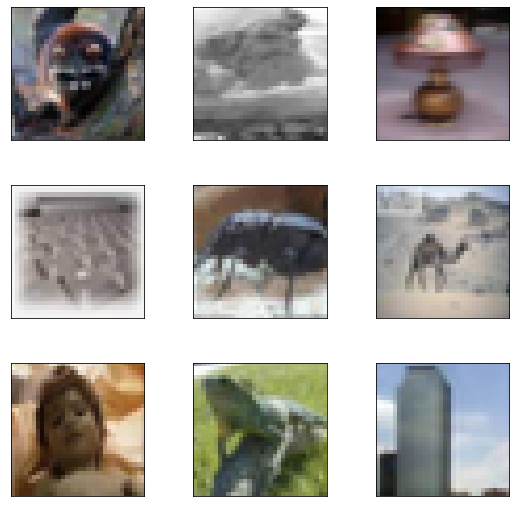

In [ ]:
fig = tfds.show_examples(ds_train, ds_info)

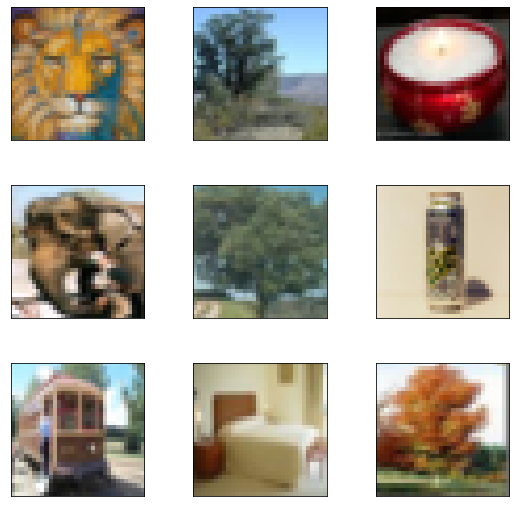

In [ ]:
fig = tfds.show_examples(ds_test, ds_info)

In [ ]:
BATCH_SIZE = 32
EPOCH = 45

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [ ]:
ds_train

<_OptionsDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(75750, shape=(), dtype=int64)
tf.Tensor(25250, shape=(), dtype=int64)


In [ ]:
ds_train.element_spec

<_OptionsDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

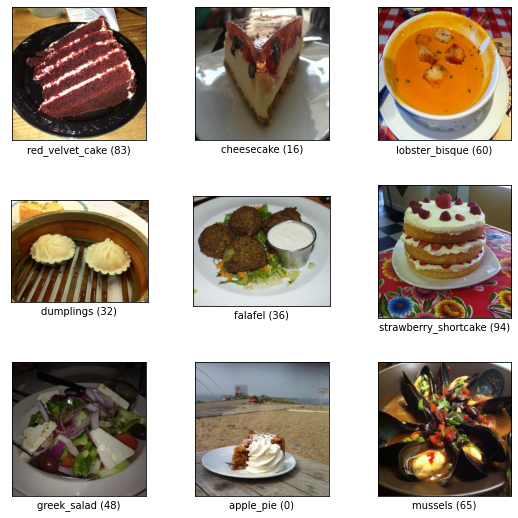

In [ ]:
fig = tfds.show_examples(ds_test, ds_info)

In [ ]:
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [ ]:
ds_info.features["label"].names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
len(ds_info.features["label"].names)

101

# 모델 생성

In [ ]:
# is_50 : True --> resnet_50
# is_plain :True --> no skip connection
    
def build_resnet_block(input_layer, num_cnn, channel, block_num,is_50, is_plain):
    # 입력 레이어
    x = input_layer
    if not is_50:
    # CNN 레이어
        for cnn_num in range(num_cnn):
            identity = x
            x = keras.layers.Conv2D(
                filters=channel,
                kernel_size=(3,3),
                strides=(1,1),
                kernel_initializer='he_normal',
                padding='same',
                name=f'block{block_num}_conv{cnn_num}'
            )(x)

            x = keras.layers.BatchNormalization()(x)
            x = keras.layers.Activation(activation='relu')(x)
            x = keras.layers.Conv2D(
                filters=channel,
                kernel_size=(3,3),
                strides=(1,1),
                kernel_initializer='he_normal',
                padding='same',
                name=f'block{block_num}_1_conv{cnn_num}'
            )(x)
            x = keras.layers.BatchNormalization()(x)
            if not is_plain:
                identity_channel = identity.shape.as_list()[-1]    

                if identity_channel != channel:
                    identity = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=(1, 1), padding="same")(identity)
                      
                # skip connection
                x = keras.layers.Add()([x,identity])
                x = keras.layers.Activation(activation='relu')(x)  
            else:
                pass
    else :
          for cnn_num in range(num_cnn):
              identity = x
              if channel == 64: 
                   x = keras.layers.Conv2D(
                          filters=channel,
                          kernel_size=(1,1),
                          strides=(1,1),
                          kernel_initializer='he_normal',
                          padding='valid',
                          name=f'block{block_num}_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                   x = keras.layers.Activation(activation='relu')(x)
                   
                   x = keras.layers.Conv2D(
                          filters=channel,
                          kernel_size=(3,3),
                          strides=(1,1),
                          kernel_initializer='he_normal',
                          padding='same',
                          name=f'block{block_num}_1_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                   x = keras.layers.Activation(activation='relu')(x)   
                   
                   x = keras.layers.Conv2D(
                          filters=channel*4,
                          kernel_size=(1,1),
                          strides=(1,1),
                          kernel_initializer='he_normal',
                          padding='valid',
                          name=f'block{block_num}_2_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                   
              elif channel != 64 and cnn_num == 0:

                   

                   x = keras.layers.Conv2D(
                          filters=channel,
                          strides=(2,2),
                          kernel_size=(1,1),
          
                          kernel_initializer='he_normal',
                          padding='same',
                          name=f'block{block_num}_3_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                   x = keras.layers.Activation(activation='relu')(x)

                   x = keras.layers.Conv2D(
                          filters=channel,
                          strides=(1,1),
                          kernel_size=(3,3),
                         
                          kernel_initializer='he_normal',
                          padding='same',
                          name=f'block{block_num}_4_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                   x = keras.layers.Activation(activation='relu')(x)

                   x = keras.layers.Conv2D(
                          filters=channel*4,
                          strides=(1,1),
                          kernel_size=(1,1),
                          
                          kernel_initializer='he_normal',
                          padding='valid',
                          name=f'block{block_num}_5_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)

              else:
                   x = keras.layers.Conv2D(
                          filters=channel,
                          strides=(1,1),
                          kernel_size=(1,1),
                          
                          kernel_initializer='he_normal',
                          padding='same',
                          name=f'block{block_num}_6_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                   x = keras.layers.Activation(activation='relu')(x)

                   x = keras.layers.Conv2D(
                          filters=channel,
                          strides=(1,1),
                          kernel_size=(3,3),
                          
                          kernel_initializer='he_normal',
                          padding='same',
                          name=f'block{block_num}_7_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                   x = keras.layers.Activation(activation='relu')(x)

                   x = keras.layers.Conv2D(
                          filters=channel*4,
                          strides=(1,1),
                          kernel_size=(1,1),
                          
                          kernel_initializer='he_normal',
                          padding='valid',
                          name=f'block{block_num}_8_conv{cnn_num}'  
                   )(x)
                   x = keras.layers.BatchNormalization()(x)
                           

             
              if not is_plain:
                  identity_channel = identity.shape.as_list()[-1]    

                  if identity_channel != channel * 4:
                        if channel == 64:
                            identity = keras.layers.Conv2D(channel * 4, kernel_size=(1, 1), strides=(1, 1), padding="valid")(identity)
                            identity = keras.layers.BatchNormalization()(identity)
                        else:
                            identity = keras.layers.Conv2D(channel * 4, kernel_size=(1, 1), strides=(2, 2), padding="valid")(identity)
                            identity = keras.layers.BatchNormalization()(identity)
                            
                  # skip connection
                  x = keras.layers.Add()([x,identity])
                  x = keras.layers.Activation(activation='relu')(x)  
              else:
                  pass
    #     Max Pooling 레이어
    # 마지막 블록 뒤에는 pooling을 하지 않음
    if identity.shape[1] != 1:        
        x = keras.layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2,
            name=f'block{block_num}_pooling'
        )(x)

    return x

In [ ]:
def build_resnet(input_shape=(32,32,3),
              num_cnn_list=[3,4,6,3],
              channel_list=[64,128,256,512],
              num_classes=100,is_50 = False, is_plain = False):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
    if is_50:
        num_cnn_list = [3,4,6,3]
        channel_list = [64,128,256,512]
        num_classes = 100

        
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    #conv1층
    output = keras.layers.Conv2D(filters=64,
                       kernel_size = (7,7),
                       strides = 2,
                         padding = 'valid')(output)
    output = keras.layers.BatchNormalization()(output)
    output = keras.layers.Activation(activation='relu')(output)
    output = keras.layers.ZeroPadding2D(padding=(1,1))(output)
    #conv2_x pooling
    output = keras.layers.MaxPooling2D(pool_size = (3,3),
                                      strides = 2,)(output)    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
          output = build_resnet_block(
                output,
                num_cnn=num_cnn, 
                channel=channel,
                block_num=i,
                is_50=is_50,
                is_plain=is_plain
          )     

            
        
    output = keras.layers.GlobalAveragePooling2D()(output)
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(2048, activation='relu', name='fc1')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

In [ ]:
resnet_34 = build_resnet(is_50 = False, is_plain = False)
resnet_50 = build_resnet(is_50 = True, is_plain = False)
plain_resnet_34 = build_resnet(is_50 = False, is_plain = True)
plain_resnet_50 = build_resnet(is_50 = True, is_plain = True)

In [ ]:
resnet_34.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 13, 13, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 13, 13, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 13, 13, 64)   0           ['batch_normalization[0][0]']

In [ ]:
plain_resnet_34.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        9472      
                                                                 
 batch_normalization_86 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                                 
 activation_82 (Activation)  (None, 13, 13, 64)        0         
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 15, 15, 64)       0         
 ng2D)                                                           
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0   

In [ ]:
resnet_50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 13, 13, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_33 (BatchN  (None, 13, 13, 64)  256         ['conv2d_4[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 activation_33 (Activation)     (None, 13, 13, 64)   0           ['batch_normalization_33[0]

In [ ]:
plain_resnet_50.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        9472      
                                                                 
 batch_normalization_119 (Ba  (None, 13, 13, 64)       256       
 tchNormalization)                                               
                                                                 
 activation_99 (Activation)  (None, 13, 13, 64)        0         
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 15, 15, 64)       0         
 ng2D)                                                           
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0   

In [ ]:
plain_resnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_resnet_34 = plain_resnet_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/45
1562/1562 [==============================] - 59s 32ms/step - loss: 4.5453 - accuracy: 0.0256 - val_loss: 4.2467 - val_accuracy: 0.0519
Epoch 2/45
1562/1562 [==============================] - 47s 30ms/step - loss: 4.0241 - accuracy: 0.0827 - val_loss: 3.9339 - val_accuracy: 0.0939
Epoch 3/45
1562/1562 [==============================] - 47s 30ms/step - loss: 3.7518 - accuracy: 0.1183 - val_loss: 3.7154 - val_accuracy: 0.1214
Epoch 4/45
1562/1562 [==============================] - 47s 30ms/step - loss: 3.5664 - accuracy: 0.1493 - val_loss: 3.5185 - val_accuracy: 0.1582
Epoch 5/45
1562/1562 [==============================] - 47s 30ms/step - loss: 3.4097 - accuracy: 0.1735 - val_loss: 3.4453 - val_accuracy: 0.1774
Epoch 6/45
1562/1562 [==============================] - 47s 30ms/step - loss: 3.2587 - accuracy: 0.2003 - val_loss: 3.3833 - val_accuracy: 0.1855
Epoch 7/45
1562/1562 [==============================] - 47s 30ms/step - loss: 3.1327 - accuracy: 0.2244 - val_loss: 3.4287 -

In [ ]:
resnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_34 = resnet_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/45
1562/1562 [==============================] - 55s 31ms/step - loss: 4.1700 - accuracy: 0.0781 - val_loss: 4.0324 - val_accuracy: 0.0971
Epoch 2/45
1562/1562 [==============================] - 48s 31ms/step - loss: 3.6014 - accuracy: 0.1504 - val_loss: 3.5394 - val_accuracy: 0.1667
Epoch 3/45
1562/1562 [==============================] - 48s 31ms/step - loss: 3.2637 - accuracy: 0.2068 - val_loss: 3.3825 - val_accuracy: 0.1934
Epoch 4/45
1562/1562 [==============================] - 48s 31ms/step - loss: 2.9803 - accuracy: 0.2597 - val_loss: 3.3429 - val_accuracy: 0.2060
Epoch 5/45
1562/1562 [==============================] - 49s 31ms/step - loss: 2.7442 - accuracy: 0.3038 - val_loss: 3.0445 - val_accuracy: 0.2598
Epoch 6/45
1562/1562 [==============================] - 48s 31ms/step - loss: 2.5114 - accuracy: 0.3542 - val_loss: 3.0367 - val_accuracy: 0.2610
Epoch 7/45
1562/1562 [==============================] - 48s 31ms/step - loss: 2.2894 - accuracy: 0.4036 - val_loss: 3.0327 -

In [ ]:
plain_resnet_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_resnet_50 = plain_resnet_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/45
1562/1562 [==============================] - 73s 41ms/step - loss: 4.8772 - accuracy: 0.0104 - val_loss: 8.9628 - val_accuracy: 0.0133
Epoch 2/45
1562/1562 [==============================] - 62s 40ms/step - loss: 4.7635 - accuracy: 0.0126 - val_loss: 4.9297 - val_accuracy: 0.0100
Epoch 3/45
1562/1562 [==============================] - 62s 40ms/step - loss: 4.7023 - accuracy: 0.0117 - val_loss: 5.1780 - val_accuracy: 0.0103
Epoch 4/45
1562/1562 [==============================] - 62s 40ms/step - loss: 4.6682 - accuracy: 0.0124 - val_loss: 5.0350 - val_accuracy: 0.0142
Epoch 5/45
1562/1562 [==============================] - 62s 40ms/step - loss: 4.6147 - accuracy: 0.0151 - val_loss: 4.7058 - val_accuracy: 0.0173
Epoch 6/45
1562/1562 [==============================] - 62s 40ms/step - loss: 4.5110 - accuracy: 0.0245 - val_loss: 4.5064 - val_accuracy: 0.0315
Epoch 7/45
1562/1562 [==============================] - 62s 40ms/step - loss: 4.3148 - accuracy: 0.0395 - val_loss: 4.2287 -

In [ ]:
resnet_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_50 = resnet_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/45
1562/1562 [==============================] - 76s 43ms/step - loss: 4.9250 - accuracy: 0.0129 - val_loss: 5.4707 - val_accuracy: 0.0165
Epoch 2/45
1562/1562 [==============================] - 66s 42ms/step - loss: 4.7095 - accuracy: 0.0170 - val_loss: 4.9268 - val_accuracy: 0.0215
Epoch 3/45
1562/1562 [==============================] - 65s 41ms/step - loss: 4.5754 - accuracy: 0.0242 - val_loss: 4.6527 - val_accuracy: 0.0265
Epoch 4/45
1562/1562 [==============================] - 64s 41ms/step - loss: 4.4006 - accuracy: 0.0363 - val_loss: 4.3719 - val_accuracy: 0.0417
Epoch 5/45
1562/1562 [==============================] - 65s 42ms/step - loss: 4.2638 - accuracy: 0.0511 - val_loss: 4.2045 - val_accuracy: 0.0560
Epoch 6/45
1562/1562 [==============================] - 63s 41ms/step - loss: 4.1514 - accuracy: 0.0630 - val_loss: 4.1451 - val_accuracy: 0.0734
Epoch 7/45
1562/1562 [==============================] - 63s 41ms/step - loss: 4.0386 - accuracy: 0.0787 - val_loss: 3.9718 -

# 성능 비교 그래프

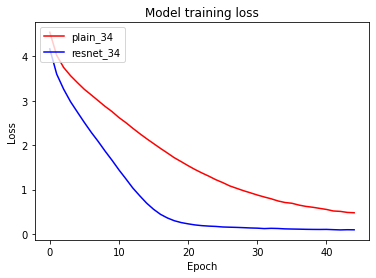

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_plain_resnet_34.history['loss'], 'r')
plt.plot(history_resnet_34.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['plain_34', 'resnet_34'], loc='upper left')
plt.show()

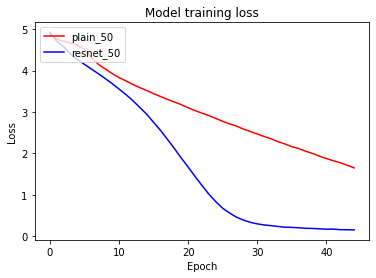

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_plain_resnet_50.history['loss'], 'r')
plt.plot(history_resnet_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['plain_50', 'resnet_50'], loc='upper left')
plt.show()

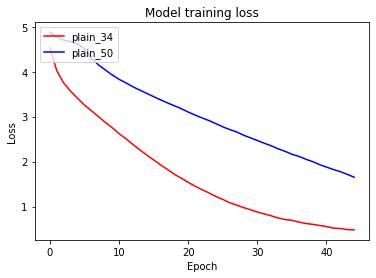

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_plain_resnet_34.history['loss'], 'r')
plt.plot(history_plain_resnet_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['plain_34', 'plain_50'], loc='upper left')
plt.show()

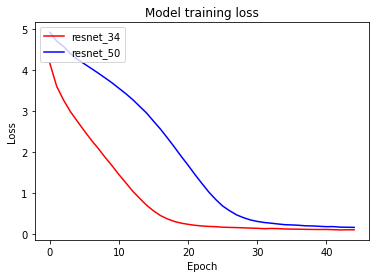

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_resnet_34.history['loss'], 'r')
plt.plot(history_resnet_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['resnet_34', 'resnet_50'], loc='upper left')
plt.show()

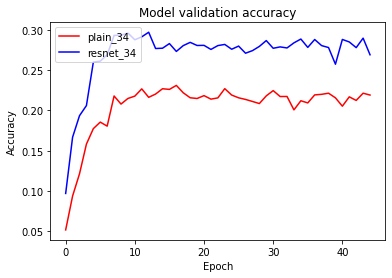

In [ ]:
plt.plot(history_plain_resnet_34.history['val_accuracy'], 'r')
plt.plot(history_resnet_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain_34', 'resnet_34'], loc='upper left')
plt.show()

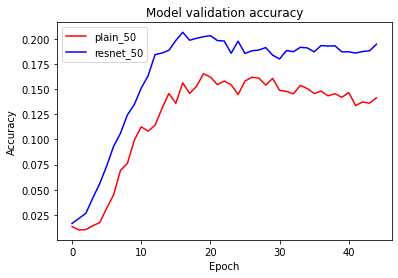

In [ ]:
plt.plot(history_plain_resnet_50.history['val_accuracy'], 'r')
plt.plot(history_resnet_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain_50', 'resnet_50'], loc='upper left')
plt.show()

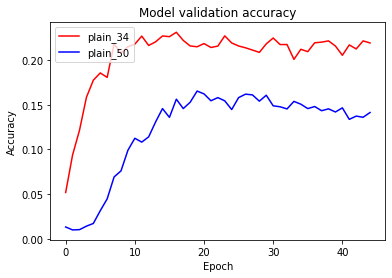

In [ ]:
plt.plot(history_plain_resnet_34.history['val_accuracy'], 'r')
plt.plot(history_plain_resnet_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain_34', 'plain_50'], loc='upper left')
plt.show()

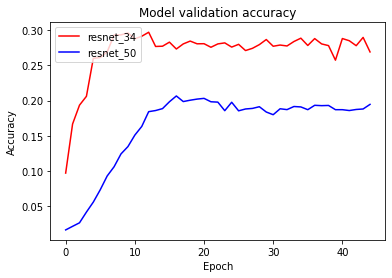

In [ ]:
plt.plot(history_resnet_34.history['val_accuracy'], 'r')
plt.plot(history_resnet_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['resnet_34', 'resnet_50'], loc='upper left')
plt.show()